In [1]:
def Graphs(df, variables="",directory="", cat_variable=''): # Defining the function with 3 input parameters.
    
    # Importing required packages
    import os
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Flag to check if any column was passed or not
    columns_flag = 0
    
    # Checking if any column is passed
    if len(variables)> 0:
        columns_flag = 1
        

#     print(type(df))  ---> Testing 
#     print(df.head()) ---> Testing

    num_col = [] # For holding numerical column names
    cat_col = [] # For holding categorical column names
    
    if df.empty: # Checking if the data frame is empy.
        print("Passed dataframe doesn't have records.")
    else:
        for x in df.columns :
            
            # Splitting the columns as numeric or categorical. 
            # Numeric column with less than 10 unique values are being considered categorical
            
            if (df[x].dtype == 'object' or ((df[x].dtype == 'int64' or df[x].dtype == 'float64') and len(pd.unique(df[x]))<10)) :
                cat_col.append(x)
            
            elif (df[x].dtype == 'int64' or df[x].dtype == 'float64' and x not in cat_col) :
                    num_col.append(x) 
            

    
    df_num = df[num_col] # New dataframe with only numerical columns
    df_cat = df[cat_col] # New dataframe with only categorical columns & those numerical columns with unique values less than 10
    

    # Creating Folders to save charts
    
    current_directory = os.getcwd() # Getting current directory
    
    final_directory_num = os.path.join(current_directory, r'Numerical_Charts') # Folder for Numercial columns' charts
    final_directory_cat = os.path.join(current_directory, r'Categorical_Charts') # Folder for Categorical columns' charts


    
    #Checking Blank Data for Numerical Columns
    if df_num.empty:
        print("Numerical data frame empty.")
    else:
        
        if not os.path.exists(final_directory_num): # Checking if folder is already present
            os.makedirs(final_directory_num) # If not the folder is created
        
        
        if columns_flag==1: # If columns were passed by users
            df_num = df_num.filter(variables) # Filter the dataframe for those required columns only

        for i in df_num.iloc[0:,0:].columns: # Now iterating through every numerical columns to generate graphs
            
            plt.style.use('seaborn-darkgrid')
            fig, ax = plt.subplots(1, 2) # For saving two graphs in a single image
            ax = np.reshape(ax, (1, 2)) # Adjusting the shape of subplot to align the two graphs side by side
            
            # Code for Box Plot
            ax[0, 0] = df_num.boxplot(column = i,grid = True, figsize = (6,4), vert = False, notch = True, ax=ax[0, 0])

            # Code for Histogram
            ax[0, 1] = df_num.hist(column=i,grid=True,figsize=(6,4),bins=10,color='blue',edgecolor='black', ax=ax[0, 1])

            fig.set_size_inches(20, 10) # Setting the size of figure
            fig.subplots_adjust(wspace=.15, left=0.035, right=.985, top=.925, bottom=.1) # Setting the alignment of the image on sheet
            plt.savefig(final_directory_num+"//"+i+".png") # Saving the graph as image in sepcified location
            plt.show() # Printing the graph on notenook as well
            plt.close()
    
    #Checking Blank Data for Categorical Columns
    if df_cat.empty:
        print("Categorical data frame empty")
    else:
        
        if not os.path.exists(final_directory_cat): # Checking if folder is already present
            os.makedirs(final_directory_cat) # If not the folder is created
    
        
        if columns_flag==1: # If columns were passed by users
                df_cat = df_cat.filter(variables) # Filter the dataframe for those required columns only
        
        for i in df_cat.iloc[0:,0:].columns: # Now iterating through every numerical columns to generate graphs

            
            # Code for Bar Plot
            df_cat[i].value_counts().plot(kind = 'bar', figsize=(10,10), color = 'blue', fontsize = 13) # Specifying the features of graph
            plt.savefig(final_directory_cat+"//"+i+".png") # Saving the graph as image in sepcified location
            plt.show() # Printing the graph on notenook as well

    return None

In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\hp\\Downloads\\attrition.csv')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


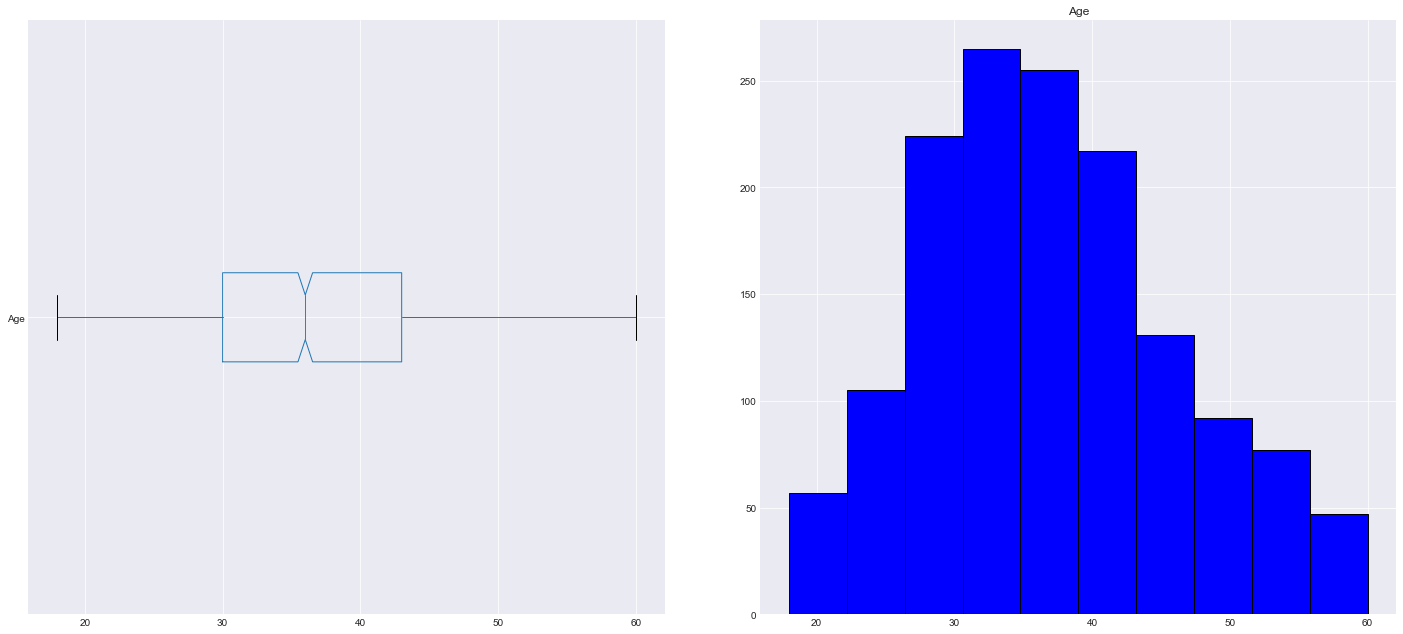

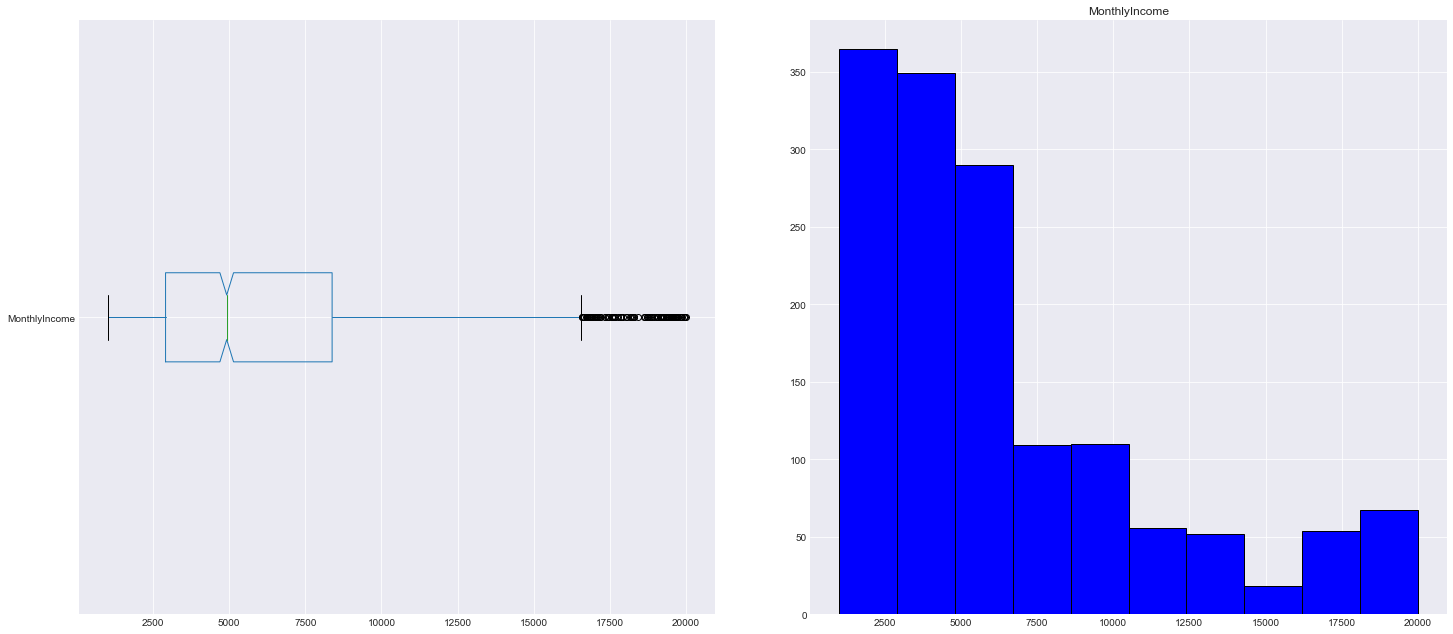

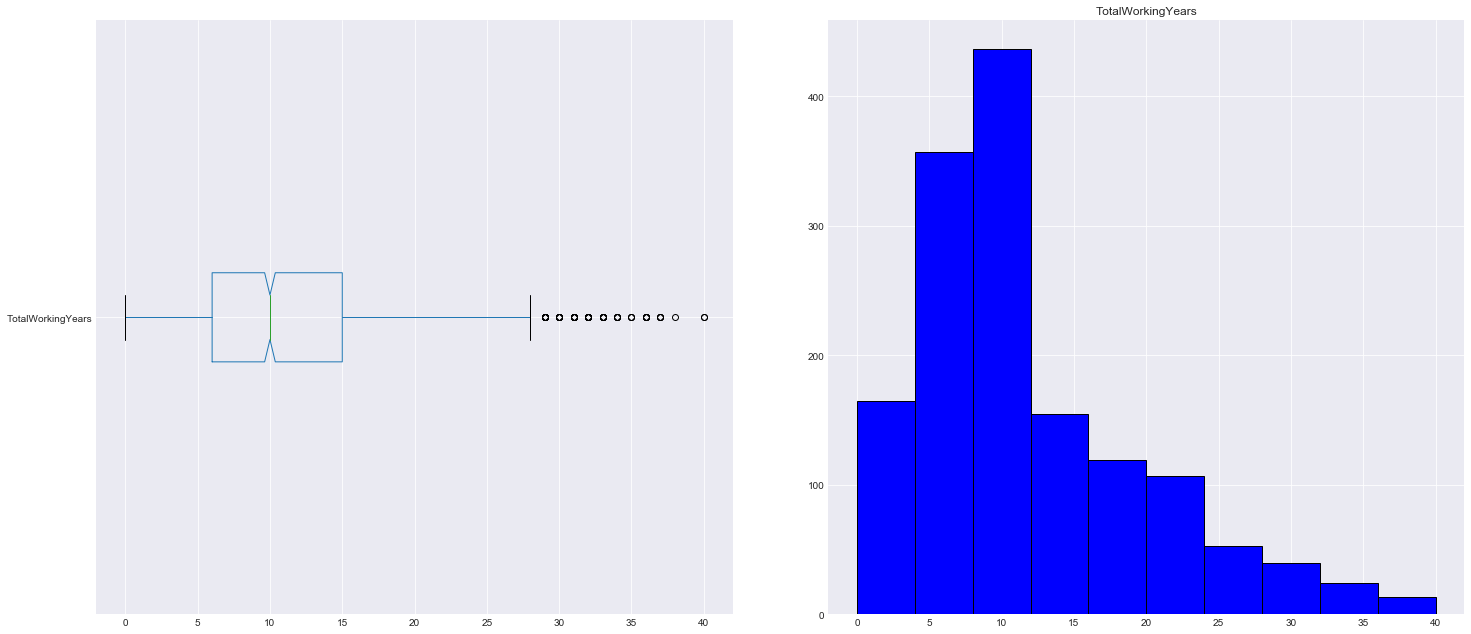

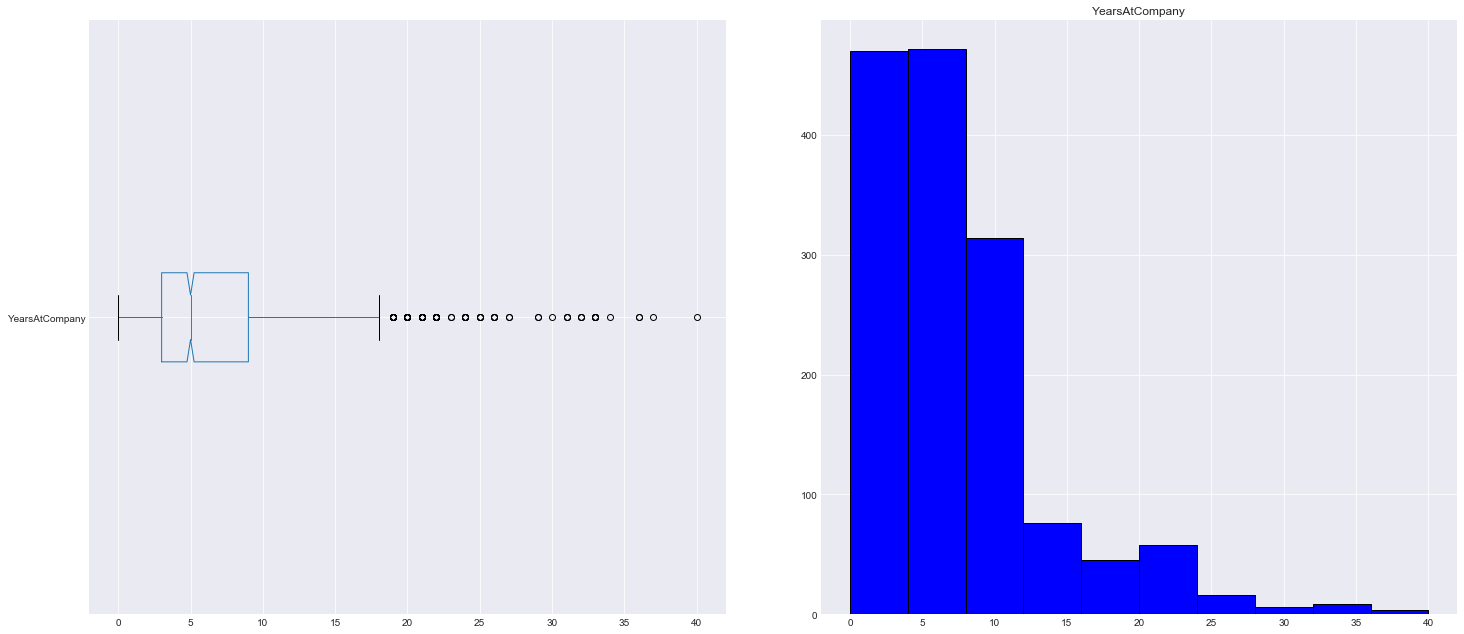

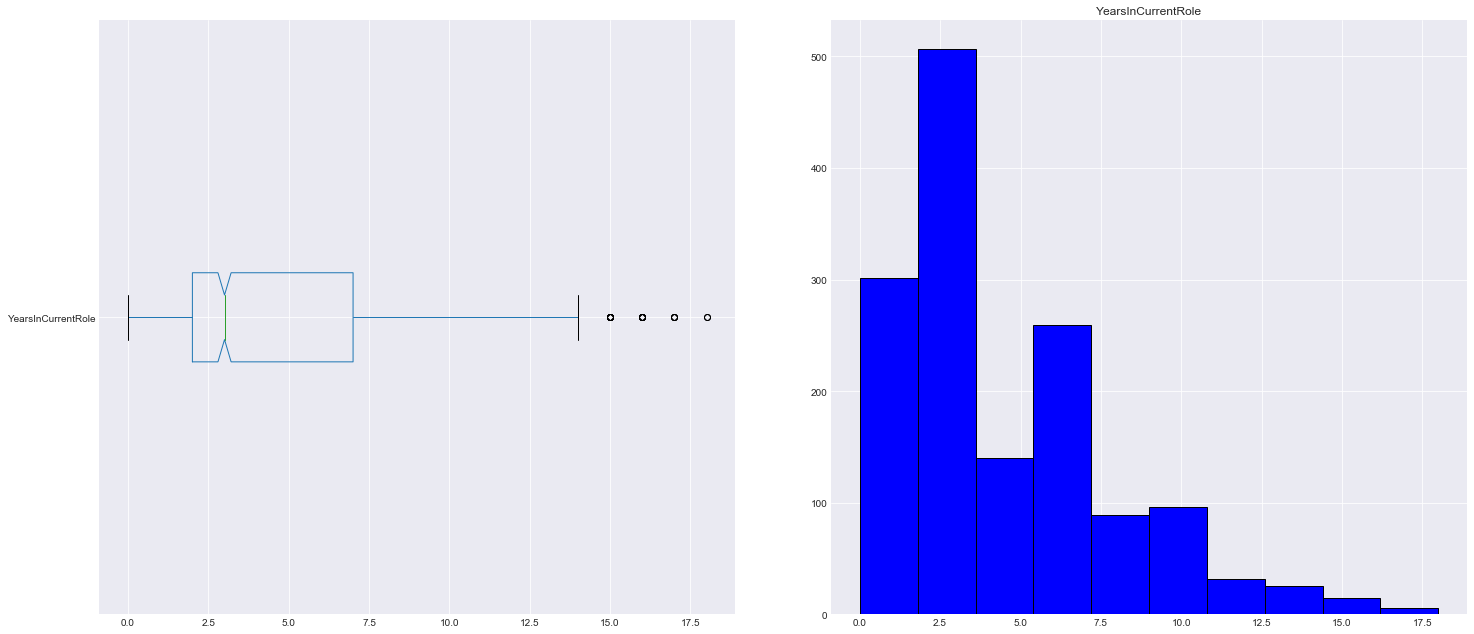

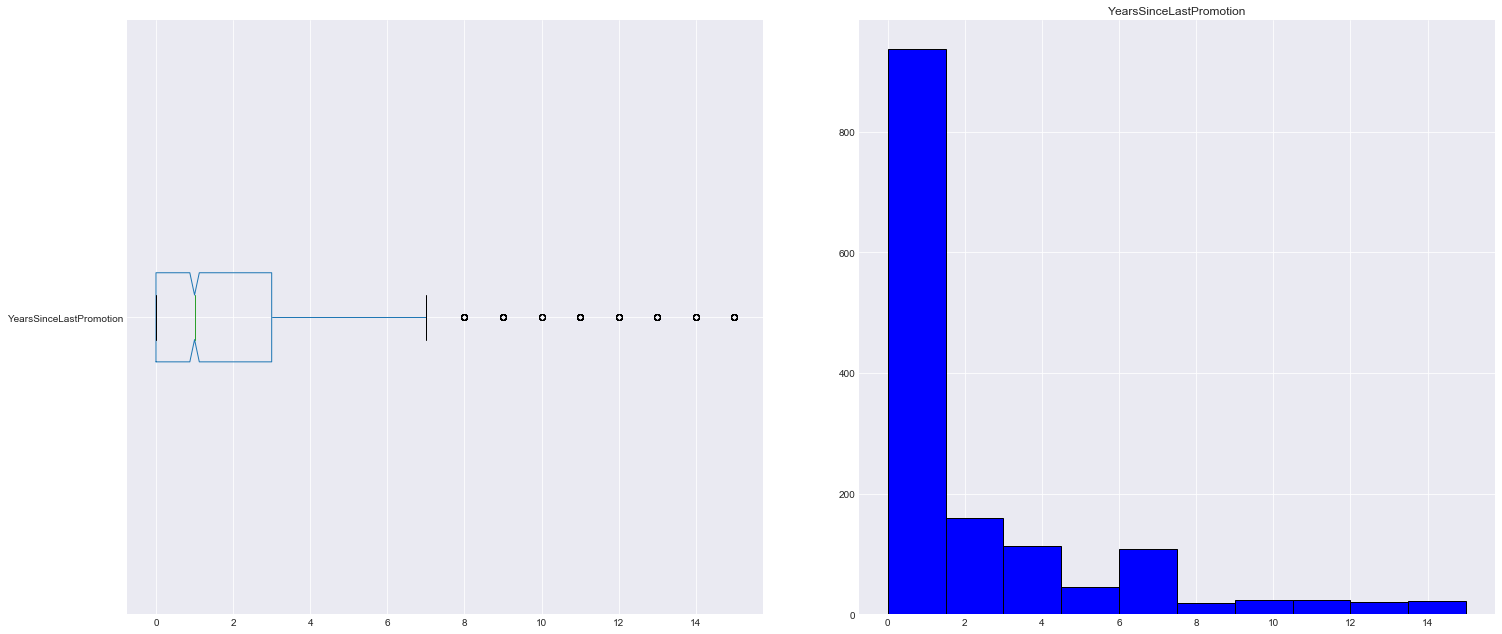

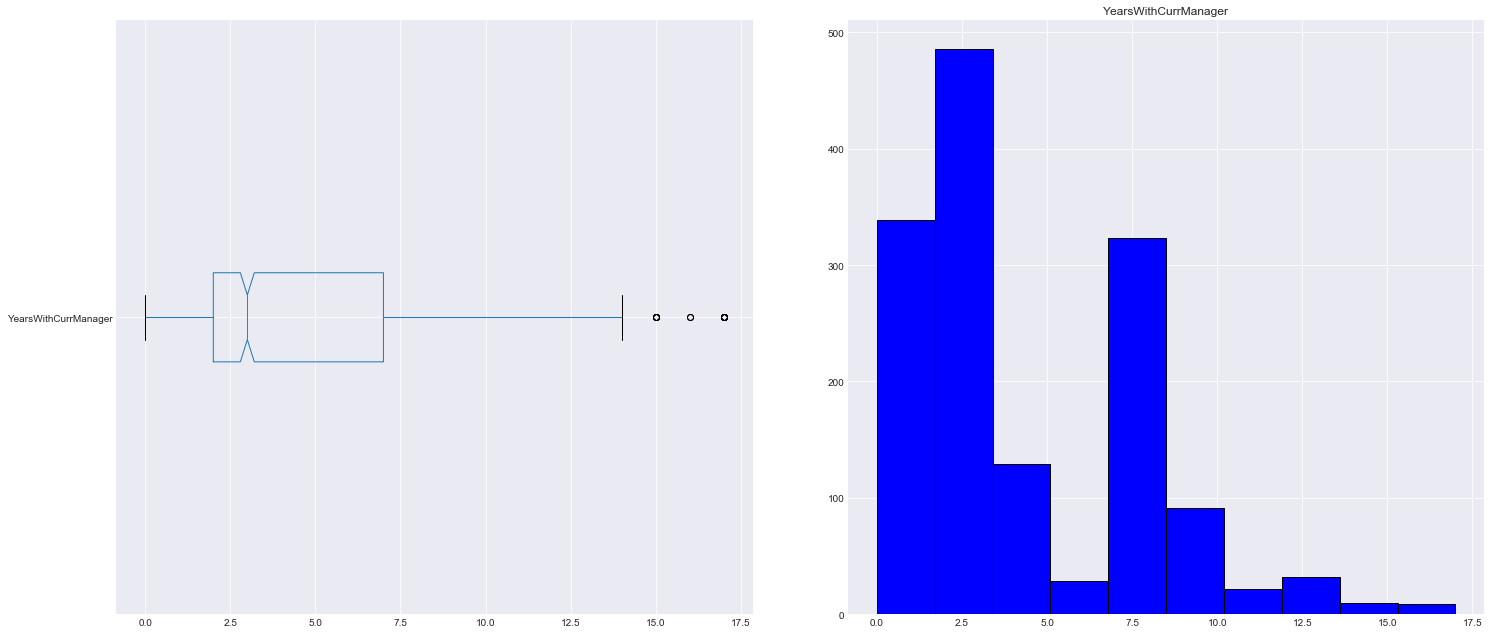

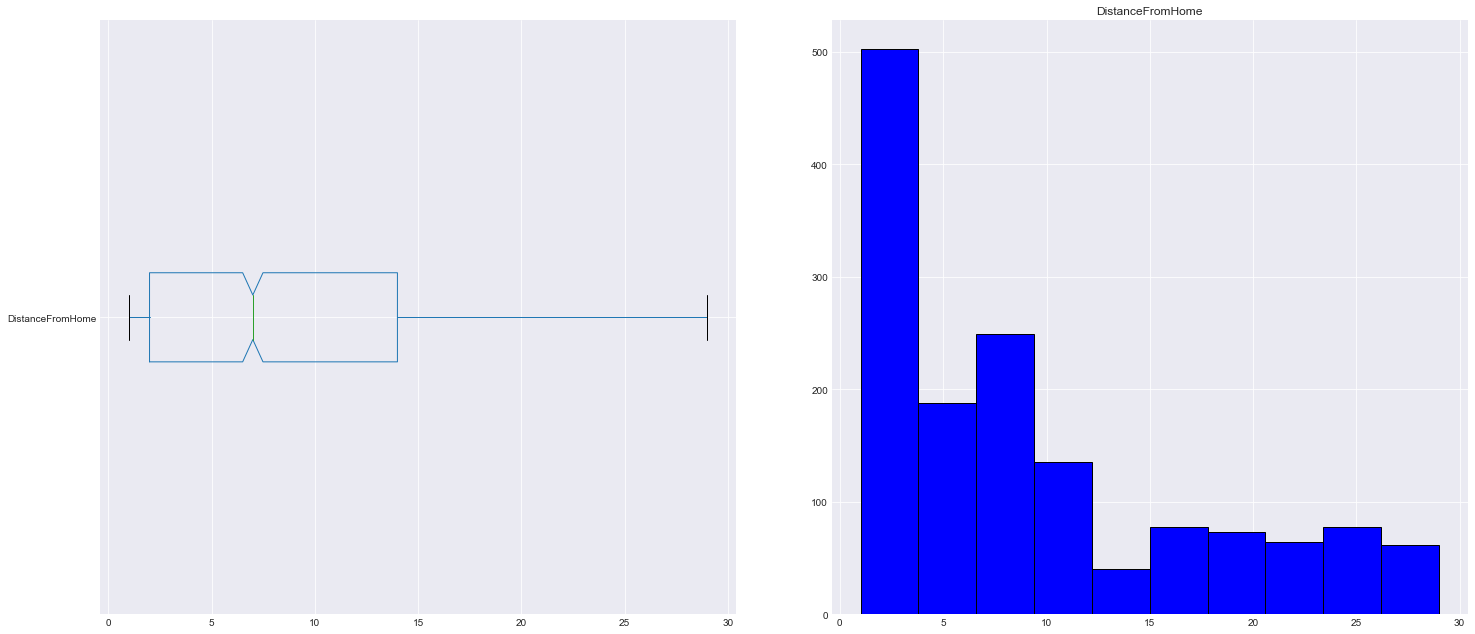

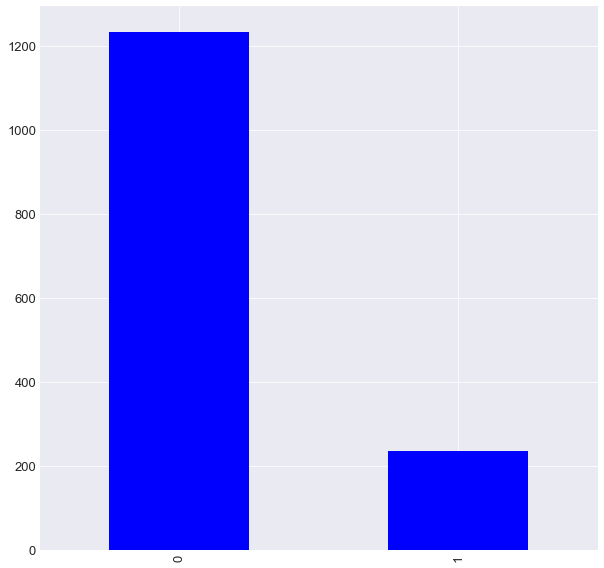

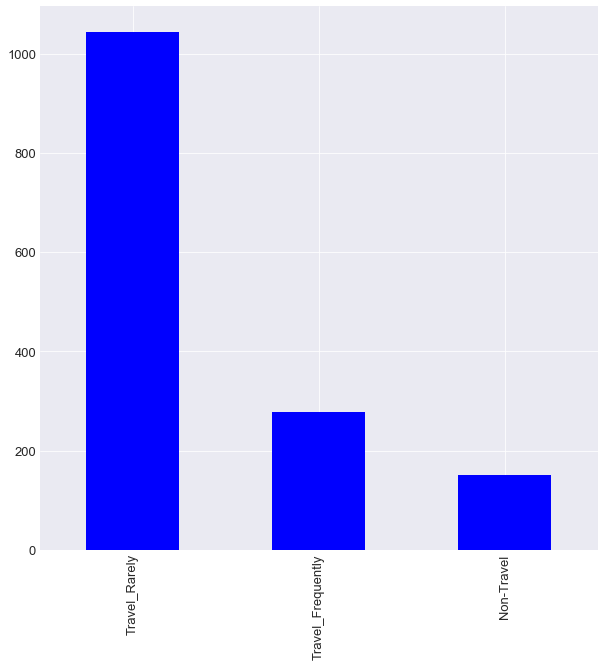

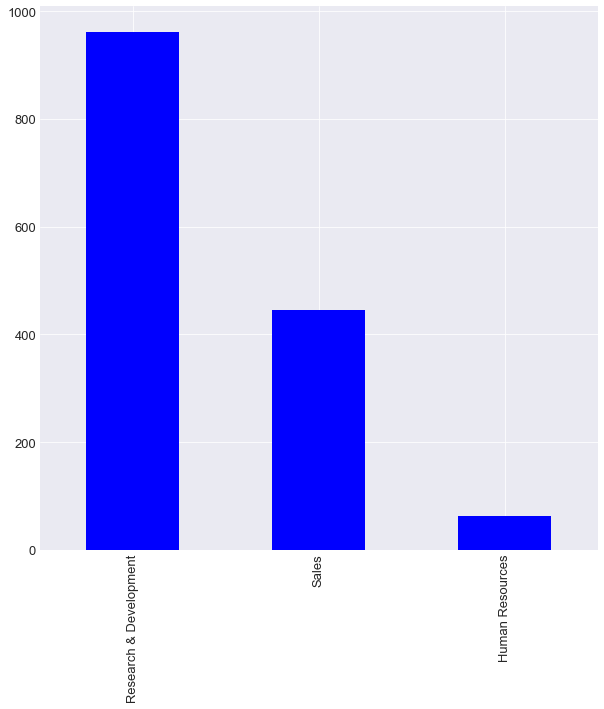

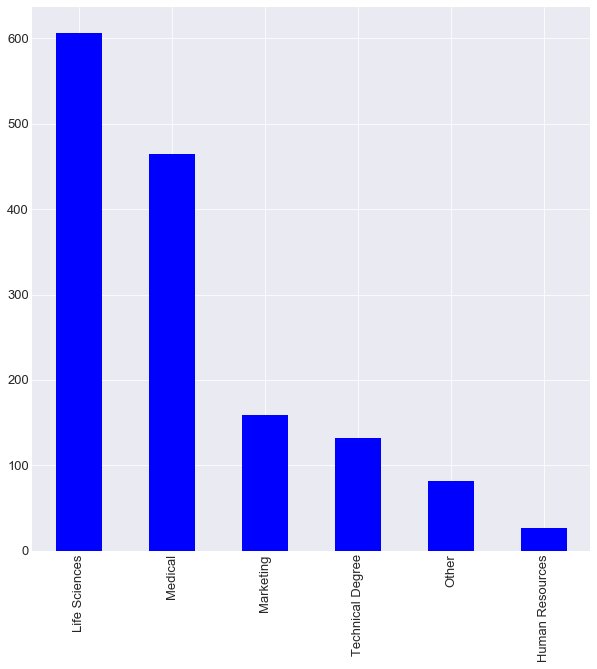

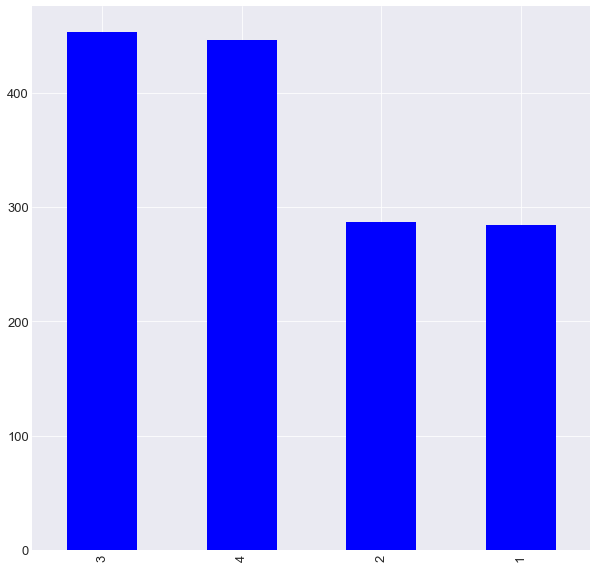

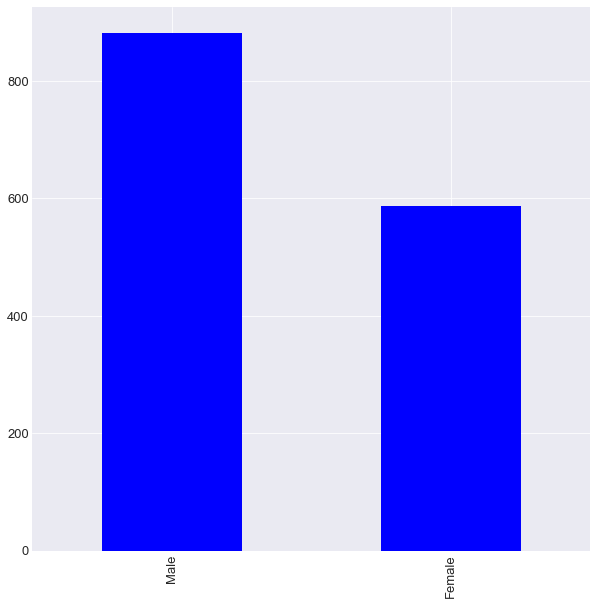

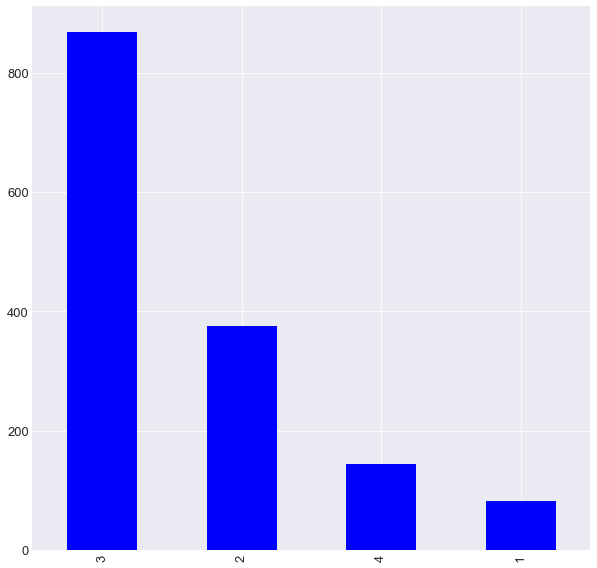

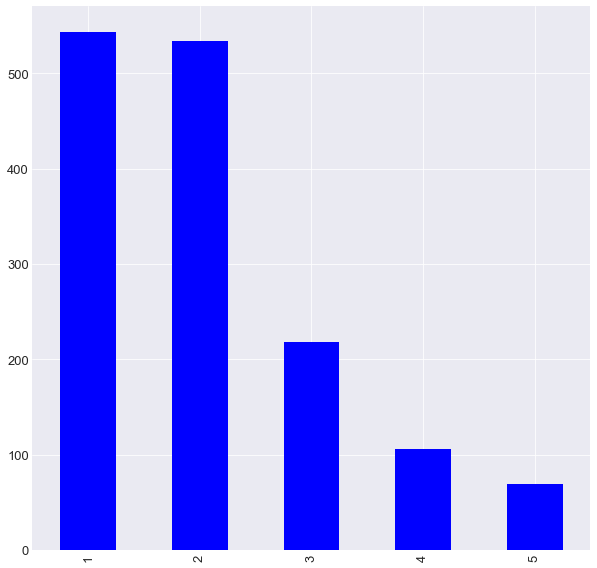

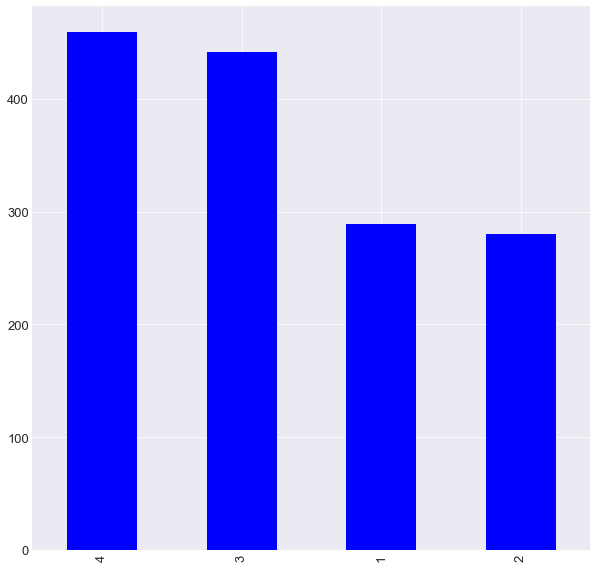

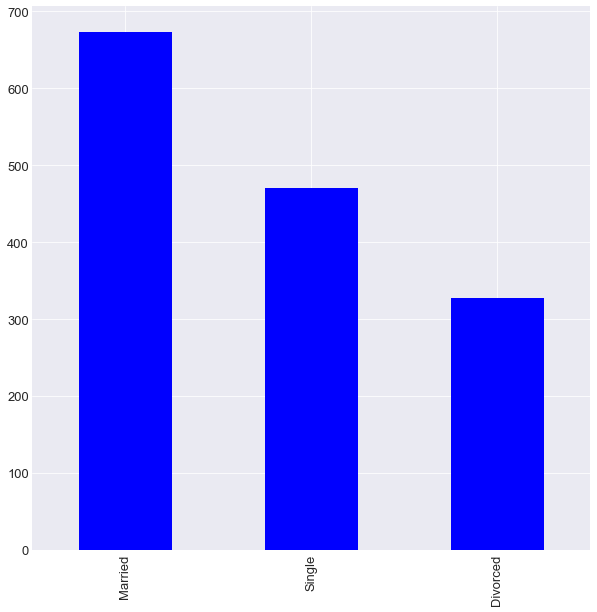

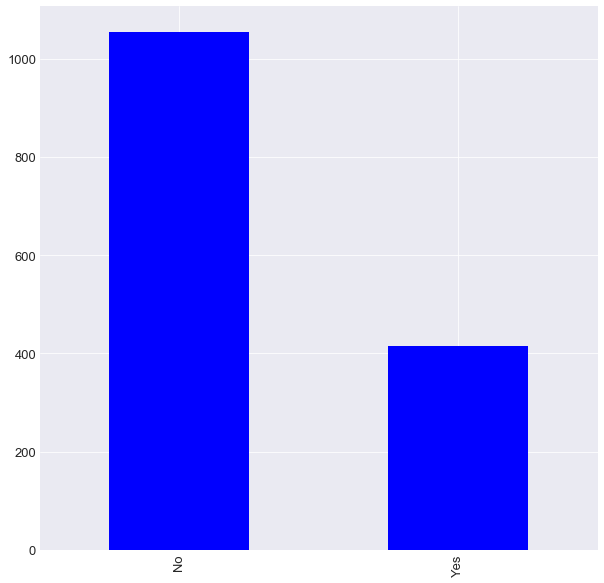

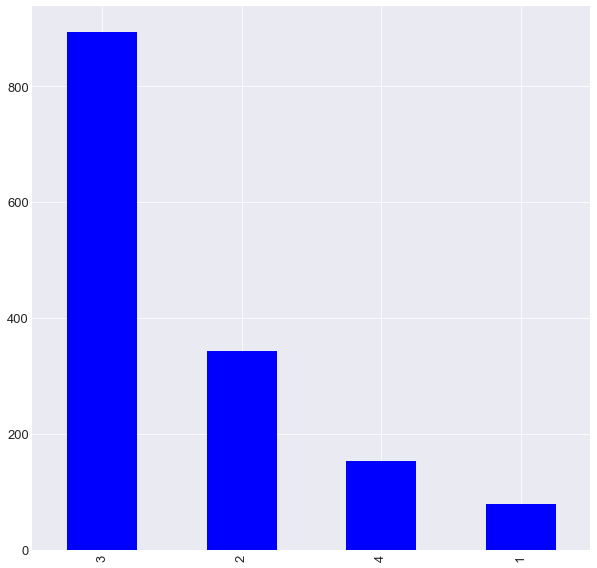

In [3]:
Graphs(df)